In [1]:
import numpy as np

Ngen=100000
siga = 5
sigx = 10.1

A = np.random.normal(0,np.sqrt(siga**2+sigx**2),(Ngen,100))

print(np.shape(A))


(100000, 100)


In [2]:
#define a Gaussian 
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [3]:
#do a fit
from scipy.optimize import curve_fit

#get histogram
amax = 30 

val = []
val_stat = []
err = []
for i in np.arange(0,np.shape(A)[1]):
    v = A[:,i]
    nv,nvx = np.histogram(v,100,range=(-amax,amax))
    xvc = (nvx[:-1] + nvx[1:]) / 2
    pars,parerr = curve_fit(gaus,xvc,nv,p0=[1000, 0, 10])
    val_stat.append(np.sqrt(np.std(v)**2-siga**2))
    val.append(np.sqrt(pars[2]**2-siga**2))
    err.append(np.sqrt(pars[2]**2/(pars[2]**2-siga**2)*parerr[2,2]))
    #err.append(np.sqrt(parerr[2,2]))
    
n,nx = np.histogram(A[:,0],100,range=(-amax,amax))

xc = (nx[:-1] + nx[1:]) / 2

print(np.shape(n))
print(np.shape(xc))

(100,)
(100,)


In [4]:


popt,pcov = curve_fit(gaus,xc,n,p0=[1000, 0, 10])

print(popt)
print(pcov)

[2.13038628e+03 1.97081710e-02 1.12378848e+01]
[[ 4.48069001e+01 -7.65234726e-06 -1.59406879e-01]
 [-7.65234726e-06  1.65875981e-03  9.57657868e-08]
 [-1.59406879e-01  9.57657868e-08  1.68582759e-03]]


In [5]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

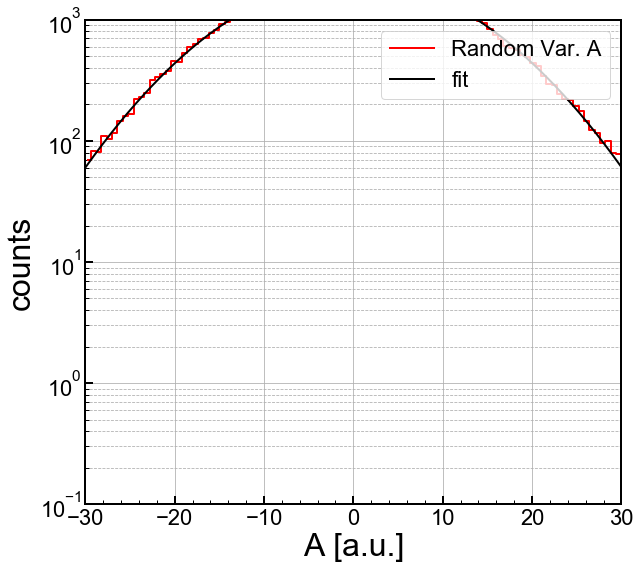

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

X = np.arange(-amax,amax,0.01)

step, = ax1.step(xc,n, where='mid',color='r', linestyle='-', label='Random Var. A', linewidth=2)
ax1.plot(X,gaus(X,*popt),'k-',label='fit')


ymin=0.1
ymax=1000


ax1.set_yscale('log')
ax1.set_xlim(-amax, amax) #in pairs
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('A [a.u.]',**axis_font)
ax1.set_ylabel('counts',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures')
plt.show()

In [7]:
sig_extract = np.sqrt(popt[2]**2-siga**2)

err_extract = np.sqrt(1/(4*(sig_extract**2-siga**2))*pcov[2,2])

print('{0:3.2f} +/- {1:3.2f}'.format(sig_extract,err_extract))

10.06 +/- 0.00


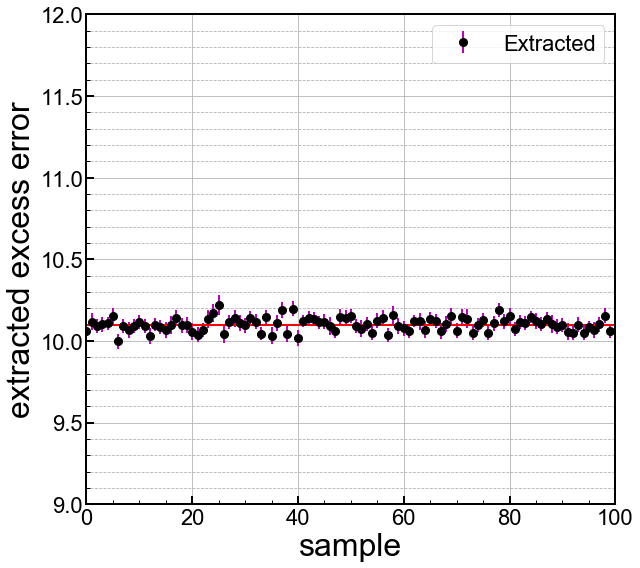

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

val_stat = np.asarray(val_stat)
val = np.asarray(val)
err = np.asarray(err)
xerr=np.zeros(np.shape(err))

ax1.errorbar(np.arange(0,np.shape(val)[0]),val,yerr=[err,err], marker='o', markersize=8, \
             ecolor='m',color='k', linestyle='none', label='Extracted', linewidth=2)


ax1.axhline(sigx,linestyle='-',color='r')

ymin=9
ymax=12


ax1.set_yscale('linear')
ax1.set_xlim(0, np.shape(val)[0]) #in pairs
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('sample',**axis_font)
ax1.set_ylabel('extracted excess error',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures')
plt.show()

In [9]:
print('{0:3.3f} +/- {1:3.3f}'.format(np.mean(val),(1/np.float(np.shape(err)[0]))*np.sqrt(np.sum(err**2))))

10.102 +/- 0.005


0.028940594701007728


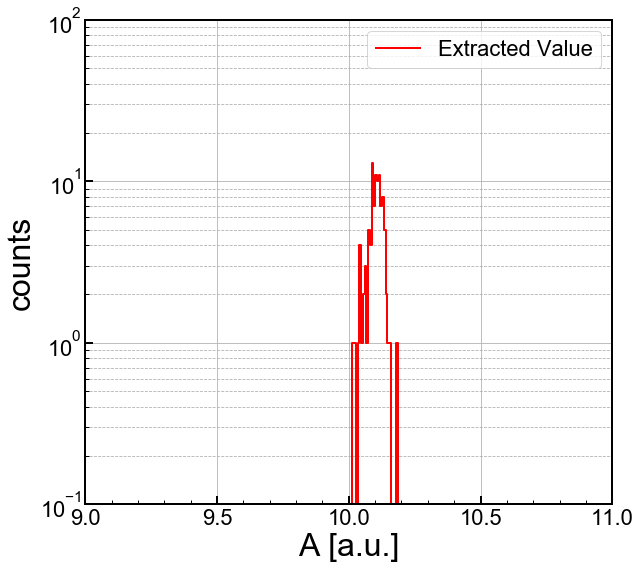

In [10]:
xmin=9
xmax=11

print(np.std(val_stat))

n_res,n_resx = np.histogram(val_stat,300,range=(xmin,xmax))


xresc = (n_resx[:-1] + n_resx[1:]) / 2

#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

X = np.arange(-amax,amax,0.01)

step, = ax1.step(xresc,n_res, where='mid',color='r', linestyle='-', label='Extracted Value', linewidth=2)



ymin=0.1
ymax=100


ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax) #in pairs
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('A [a.u.]',**axis_font)
ax1.set_ylabel('counts',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures')
plt.show()